In [9]:
import numpy as np
import seaborn as sns
import torch.nn as nn
import pandas as pd
import torch

cars = pd.read_csv('https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv')
cars.head()

x_list = cars.wt.values
y_list = cars.mpg.values.tolist()

x_np = np.array(x_list, dtype=np.float32).reshape(-1, 1)
y_np = np.array(y_list, dtype=np.float32).reshape(-1, 1)

X = torch.from_numpy(x_np)
Y = torch.from_numpy(y_np)

In [5]:
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_dim, output_dim)

In [6]:
loss_fun = nn.MSELoss()


In [8]:
LR = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [11]:
losses, slope, bias = [], [], []
NUM_EPOCHS = 1000

for epoch in range(NUM_EPOCHS):
    optimizer.zero_grad()
    
    y_pred = model(X)
    
    loss = loss_fun(y_pred, Y)
    loss.backward()
    
    optimizer.step()
    
    for name, params in model.named_parameters():
        if params.requires_grad:
            if name == 'linear.weight':
                slope.append(params.data.numpy()[0][0])
                
            if name == 'linear.bias':
                bias.append(params.data.numpy()[0])
                
    losses.append(float(loss.data))
    
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.data: .4f}')

Epoch: 0, Loss:  179.7189
Epoch: 100, Loss:  67.2948
Epoch: 200, Loss:  40.5686
Epoch: 300, Loss:  26.0322
Epoch: 400, Loss:  18.1259
Epoch: 500, Loss:  13.8256
Epoch: 600, Loss:  11.4867
Epoch: 700, Loss:  10.2146
Epoch: 800, Loss:  9.5227
Epoch: 900, Loss:  9.1463


<Axes: >

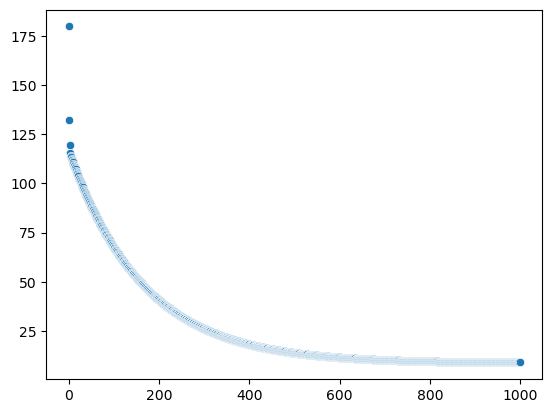

In [16]:
sns.scatterplot(x=range(NUM_EPOCHS), y=losses)

<Axes: >

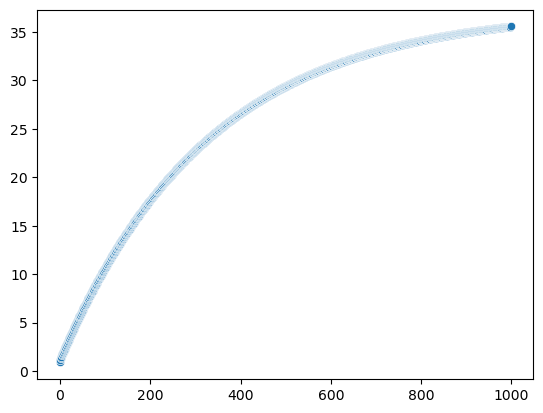

In [15]:
sns.scatterplot(x=range(NUM_EPOCHS), y=bias)

<Axes: >

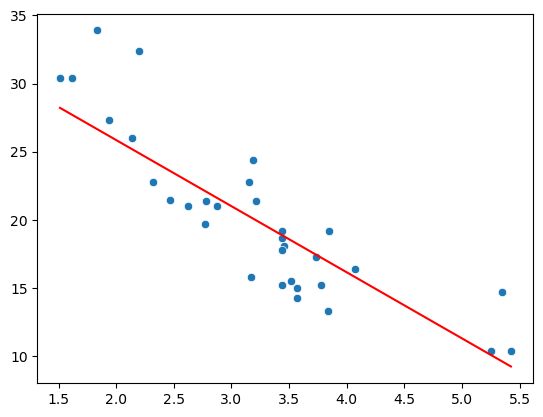

In [22]:
y_pred = model(X).data.numpy().reshape(-1)
sns.scatterplot(x=x_list, y=y_list)
sns.lineplot(x=x_list, y=y_pred, color='red')